In [17]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
data = pd.read_csv('../data/Emotion_final.csv')

In [19]:
data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [20]:
# répartition des textes par émotions
emotion_counts = data['Emotion'].value_counts()
emotion_counts

Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

## Les Stopwords

**_ntlk.download('stopwords')_** : permet de télécharger la liste des stopwords en anglais à partir du package NLTK (Natural Language Toolkit). La première fois que vous exécutez cette ligne, NLTK téléchargera les stopwords depuis Internet. Cela ne doit être fait qu'une seule fois.

**_stopwords = stopwords.words('english')_** : charge les stopwords anglais dans une variable appelée "stopwords". Cette liste de stopwords sera utilisée ultérieurement pour filtrer les mots courants lors de l'analyse des textes.

In [21]:
# les stopwords potentiels
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Identifier les 30 mots les plus courants pour chaque sentiment

In [25]:
#Pour chaque sentiment, identifiez les 30 mots les plus courants en dehors des stopwords

nltk.download('punkt') # télécharge les ressources nécessaires pour effectuer la tokenisation des mots en utilisant la fonction word_tokenize de NLTK.

emotions = data['Emotion'].unique()

for emotion in emotions:
    filtered_text = ' '.join(data[data['Emotion'] == emotion]['Text'])  # elle filtre les textes correspondants à cette émotion à partir du DataFrame data et les concatène en une seule chaîne de texte
    word_tokens = word_tokenize(filtered_text.lower()) # Cette ligne utilise la fonction word_tokenize de NLTK pour diviser la chaîne de texte filtrée en une liste de mots (tokens). Les mots sont convertis en minuscules à l'aide de la méthode lower() pour assurer une consistance dans l'analyse des mots.
    filtered_words = [word for word in word_tokens if word.isalpha() and word not in stopwords] # Cette ligne utilise une compréhension de liste pour filtrer les mots tokens. Les mots sont filtrés en vérifiant s'ils sont composés uniquement de caractères alphabétiques (word.isalpha()) et s'ils ne sont pas présents dans la liste des stopwords (stopwords).
    fdist = FreqDist(filtered_words) # Cette ligne crée un objet de la classe FreqDist de NLTK, qui calcule la fréquence de chaque mot dans la liste filtered_words.
    print(emotion)
    print(fdist.most_common(30))


[nltk_data] Downloading package punkt to /home/apprenant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


sadness
[('feel', 4095), ('feeling', 1924), ('like', 1078), ('im', 875), ('really', 352), ('know', 344), ('get', 289), ('would', 273), ('time', 270), ('little', 267), ('ive', 266), ('still', 243), ('even', 239), ('want', 237), ('one', 230), ('life', 228), ('people', 226), ('think', 222), ('bit', 220), ('things', 194), ('much', 191), ('dont', 190), ('make', 183), ('day', 177), ('something', 170), ('back', 167), ('going', 164), ('way', 162), ('could', 159), ('pretty', 146)]
anger
[('feel', 1803), ('feeling', 923), ('like', 479), ('im', 426), ('really', 171), ('get', 154), ('people', 150), ('know', 149), ('time', 146), ('little', 136), ('want', 129), ('even', 125), ('would', 118), ('angry', 116), ('think', 111), ('one', 108), ('could', 108), ('things', 105), ('bit', 103), ('way', 102), ('offended', 92), ('dont', 91), ('resentful', 87), ('cold', 86), ('still', 85), ('something', 85), ('irritable', 84), ('cant', 83), ('going', 81), ('bothered', 81)]
love
[('feel', 1180), ('feeling', 471), (

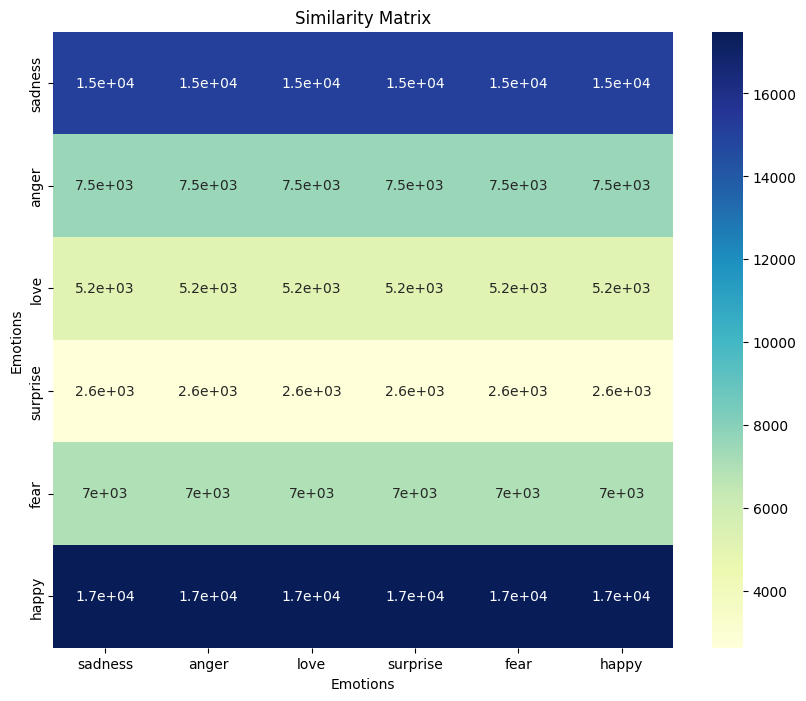

In [27]:
emotions = data['Emotion'].unique()
emotion_word_counts = {}

for emotion in emotions:
    filtered_text = ' '.join(data[data['Emotion'] == emotion]['Text'])
    word_tokens = word_tokenize(filtered_text.lower())
    filtered_words = [word for word in word_tokens if word.isalpha() and word not in stopwords]
    fdist = FreqDist(filtered_words)
    emotion_word_counts[emotion] = fdist

common_words = set()
for emotion in emotions:
    common_words.update([word for word, _ in emotion_word_counts[emotion].most_common(30)])

emotion_word_matrix = pd.DataFrame(0, index=emotions, columns=emotions)

for emotion1 in emotions:
    for emotion2 in emotions:
        common_words_count = sum(emotion_word_counts[emotion1][word] for word in common_words)
        emotion_word_matrix.at[emotion1, emotion2] = common_words_count

plt.figure(figsize=(10, 8))
sns.heatmap(emotion_word_matrix, annot=True, cmap="YlGnBu")
plt.xlabel('Emotions')
plt.ylabel('Emotions')
plt.title('Similarity Matrix')
plt.show()


Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64


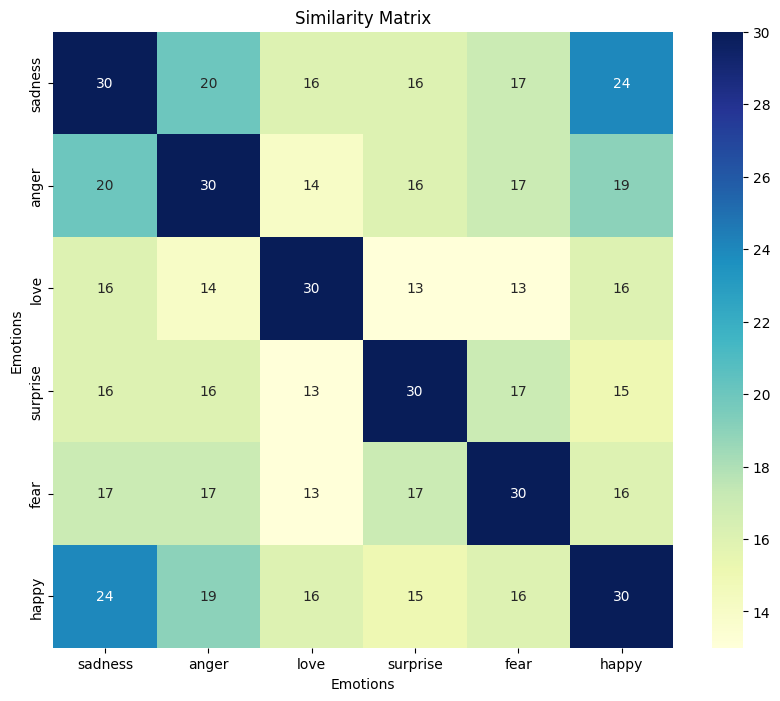

In [29]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Étudier la répartition des textes par émotions
emotion_counts = data['Emotion'].value_counts()
print(emotion_counts)

# Charger le modèle de langue Spacy
nlp = spacy.load('en_core_web_sm')

# Identifier les stopwords
stop_words = STOP_WORDS

# Initialiser un dictionnaire pour stocker les mots les plus courants par émotion
common_words_by_emotion = {}

# Pour chaque émotion
for emotion in data['Emotion'].unique():
    # Filtrer les textes correspondants à l'émotion
    filtered_text = ' '.join(data[data['Emotion'] == emotion]['Text'])
    
    # Tokeniser le texte avec Spacy
    doc = nlp(filtered_text)
    
    # Filtrer les mots
    filtered_words = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in stop_words]
    
    # Compter les mots
    word_counts = Counter(filtered_words)
    
    # Obtenir les 30 mots les plus courants
    common_words = word_counts.most_common(30)
    
    # Stocker les mots les plus courants par émotion
    common_words_by_emotion[emotion] = [word for word, count in common_words]

# Définir une métrique de proximité entre les émotions
proximity_matrix = pd.DataFrame(0, index=common_words_by_emotion.keys(), columns=common_words_by_emotion.keys())

# Calculer la proximité entre les émotions basée sur les mots communs
for emotion1 in common_words_by_emotion:
    for emotion2 in common_words_by_emotion:
        common_words_count = len(set(common_words_by_emotion[emotion1]) & set(common_words_by_emotion[emotion2]))
        proximity_matrix.at[emotion1, emotion2] = common_words_count

# Afficher la matrice de proximité sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(proximity_matrix, annot=True, cmap="YlGnBu")
plt.xlabel('Emotions')
plt.ylabel('Emotions')
plt.title('Similarity Matrix')
plt.show()

# Créer les modèles Bag of Words et TF-IDF
# (Vous devez choisir une méthode spécifique pour gérer la ponctuation, les émojis, la lemmatisation, etc. en fonction de vos besoins)
# ... Code à ajouter pour créer les modèles Bag of Words et TF-IDF ...

